# Table of Contents
- <b> [1. Project Overview](#chapter1)
    - [1.1. Introduction](#section_1_1)
    - [1.2. Objective](#section_1_2)
- <b> [2. Importing Packages](#chapter2)
- <b> [3. Data Loading](#chapter3)
- <b> [4. Data Cleaning](#chapter4)
- <b> [5. Exploratory Data Analysis (EDA)](#chapter5)
- <b> [6. Conclusion and Insights](#chapter6)</b>

# 1. Project Overview <a class="anchor" id="chapter1"></a>

## 1.1. Introduction<a class="anchor" id="section_1_1"></a>

Deforestation is one of the most significant modern challenges with extensive implications on the environment, economy and society. The process involves the reduction of forest area through the removal of vegetation and trees, leaving the land barren or significantly altered. This is typically driven by factors such as the expansion of agricultural fields, urban development and some industrial activities. The ongoing loss of forest area results in significant ramifications, including habitat destruction, biodiversity loss and the displacement of indigenous communities. Therefore, the understanding of deforestation trends is paramount for devising conservation strategies, identifying most affected countries and implementing sustainable practices.(references)

This project aims to explore and analyse a World forest area dataset to identify deforestation trends and address key questions related to forest area. The data is sourced from Kaggle, uploaded by Takumi Watanabe and last updated 10 months ago.(reference) It comprises of the following features:
* Country_name: list of country names, regions, and income statuses, with each element (country, region, income status) appearing as a distinct entry.
* Country_code: A three letter code that distinctively represents a country.
* 1990 - 2021 year columns: The annual total forest area  expressed in square kilometres.
 

The key questions to be explored in this project are as follow:

* What are the global trends in forest area from 1990 and 2021?
* How does the rate of deforestation or afforestation compare across different countries?
* Which countries, regions and income levels have seen the largest decrease or increase in forest area between 1990 and 2021?
* What is the relationship between the rate of deforestation and Income status?
* What is the relationship between rate of deforestation and region?


This notebook is organised into several key sections to ensure a structured data analysis approach is employed. The approach leverages Python’s extensive data analysis and visualisation libraries to facilitate an in-depth examination of the dataset. This includes pandas, numpy, matplotlib and seaborn. In the Importing Packages section, these libraries are loaded.  The Data loading section details how the  data is loaded into a DataFrame and initial inspection is performed. In the Data Cleaning section, the data is cleaned and prepared for further analyses by handling missing or inconsistent data. The exploratory data analysis (EDA) section applies both data visualisations and statistical methods to uncover key trends and insights relevant to the project’s objective. The results of the analyses will provide a comprehensive understanding of global deforestation and afforestation trends, highlighting which countries have experienced the greatest losses or gains in forest area. This will be summarised and presented in the last section, Conclusion, including recommendations based on obtained insights.

### 1.1.1 Problem Statement<a class="anchor" id="section_1_1_1"></a>

How has forest area changed globally over the years and which countries, regions and income levels are most affected ?


## 1.2. Objective<a class="anchor" id="section_1_2"></a>

* To perform exploratory data analysis of the global deforestation dataset.
* To analyse the change in global forest area from 1990 and 2021, identifying trends of deforestation or afforestation for each country.
* To identify countries, regions and income levels that have the largest decrease and increase in forest area between 1990 and 2021.
* To determine the relationship between income status and rate of deforestation.
* To determine the relationship between various regions and rate of deforestation.


# 2. Importing Packages<a class="anchor" id="chapter2"></a>

In this section, we import essential packages for data analysis and visualisation:

- **NumPy**: Provides support for numerical operations, including handling missing values.
- **Pandas**: Used for data manipulation and analysis, especially with DataFrames.
- **Seaborn**: Built on top of Matplotlib, this library provides more advanced and visually appealing plots, making it easier to generate insights.
- **Matplotlib**: A core plotting library for basic visualizations.

We also use the following setup:
- `%matplotlib inline`: Ensures that all plots render directly within this notebook.
- `warnings.filterwarnings('ignore')`: Suppresses unnecessary warnings during execution to keep the output clean and focused on important results.


In [51]:
# Libraries for data loading, manipulation and analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading<a class="anchor" id="chapter3"></a>

In this section, we load the dataset into the notebook for further analysis. The following steps are performed:

- **Loading the dataset**: We use **Pandas** to read the data from a CSV file into a DataFrame. This allows for efficient manipulation and analysis.
  
- **Exploring the structure**: After loading, we inspect the first few rows of the dataset using `.head()` to get a quick overview of the data and its columns.

- **Making a copy**: To preserve the original dataset, we create a copy of it. This ensures that any modifications or cleaning steps do not affect the original data.

- **Inspecting the dataset**:
  - `.shape`: This method gives us the dimensions of the dataset (number of rows and columns) to understand its size.
  - `.info()`: Provides a concise summary of the dataset, including the column names, non-null counts, and data types. This helps us confirm that the data types are correctly interpreted and identify any missing values.

This initial inspection ensures that the dataset is structured correctly before moving on to data cleaning and analysis.


In [52]:
# Display all columns
pd.set_option("display.max_columns", None)

In [53]:
# loading dataset
original_df = pd.read_csv("forest_area_km.csv", index_col=False)

# Display the first few rows
original_df.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40
1,Albania,ALB,7888.00,7868.50,7849.00,7829.50,7810.00,7790.50,7771.00,7751.50,7732.00,7712.50,7693.00,7705.77,7718.54,7731.31,7744.08,7756.85,7769.62,7782.39,7795.16,7807.93,7820.70,7834.94,7849.17,7863.40,7877.64,7891.88,7891.80,7889.02,7889.00,7889.00,7889.00,7889.00
2,Algeria,DZA,16670.00,16582.00,16494.00,16406.00,16318.00,16230.00,16142.00,16054.00,15966.00,15878.00,15790.00,16129.00,16468.00,16807.00,17146.00,17485.00,17824.00,18163.00,18502.00,18841.00,19180.00,19256.00,19332.00,19408.00,19484.00,19560.00,19560.00,19430.00,19300.00,19390.00,19490.00,19583.33
3,American Samoa,ASM,180.70,180.36,180.02,179.68,179.34,179.00,178.66,178.32,177.98,177.64,177.30,177.00,176.70,176.40,176.10,175.80,175.50,175.20,174.90,174.60,174.30,174.00,173.70,173.40,173.10,172.80,172.50,172.20,171.90,171.60,171.30,171.00
4,Andorra,AND,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00


In [54]:
# Create copy of dataset
df = original_df.copy()

In [55]:
# Replace spaces with underscores
df.columns = [col.replace(' ', '_') for col in df.columns]

In [56]:
# Displays number of rows and columns
df.shape

(259, 34)

**Results**: The dataset consists of 259 rows and 34 columns.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country_Name  259 non-null    object 
 1   Country_Code  259 non-null    object 
 2   1990          215 non-null    float64
 3   1991          219 non-null    float64
 4   1992          248 non-null    float64
 5   1993          251 non-null    float64
 6   1994          251 non-null    float64
 7   1995          251 non-null    float64
 8   1996          251 non-null    float64
 9   1997          251 non-null    float64
 10  1998          251 non-null    float64
 11  1999          251 non-null    float64
 12  2000          253 non-null    float64
 13  2001          253 non-null    float64
 14  2002          253 non-null    float64
 15  2003          253 non-null    float64
 16  2004          253 non-null    float64
 17  2005          253 non-null    float64
 18  2006          255 non-null    

**Results**: Country_Name and Country_Code are objects with no null values, columns 1990 - 2011 have some null values

# 4. Data Cleaning<a class="anchor" id="chapter4"></a>

In this section, we clean the dataset to ensure its quality and readiness for analysis:

- **Handling missing values**: We identify and deal with any missing or `NaN` values in the dataset. Depending on the situation, this might involve:
  - Removing rows or columns with missing data.
  - Filling missing values with a placeholder (e.g., mean, median, mode or a constant).

- **Removing duplicates**: We check for and remove any duplicate rows in the dataset to ensure we are working with unique records.

- **Data type correction**: We ensure that each column has the correct data type (e.g., numeric columns as `float`, categorical columns as `object`).

Data cleaning ensures that the dataset is accurate, consistent, and structured in a way that makes analysis more reliable and meaningful.


The `print_null_values` function identifies and displays the number of missing (`null`) values in each column, helping to assess data completeness before cleaning.


In [58]:
def print_null_values(df):
    """
    Prints the count of null (missing) values for each column that has more than 0 null values.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame to check for null values.

    Returns:
    None
    """
    null_counts = df.isnull().sum()
    
    # Filter out columns with no null values
    null_counts = null_counts[null_counts > 0]
    
    if null_counts.empty:
        print("No columns with null values.")
    else:
        print("Columns with null values:")
        print(null_counts)
        

print_null_values(df)

Columns with null values:
1990    44
1991    40
1992    11
1993     8
1994     8
1995     8
1996     8
1997     8
1998     8
1999     8
2000     6
2001     6
2002     6
2003     6
2004     6
2005     6
2006     4
2007     4
2008     4
2009     4
2010     4
2011     1
dtype: int64


**Results**: The columns from 1990 to 2011 contain missing values, with the earliest years (1990-1992) having the most missing values.

The `trim_spaces` function removes leading and trailing whitespace from string columns to ensure consistent formatting in the dataset.


In [59]:
def trim_spaces(df, columns):
    """
    Trims leading and trailing spaces from the specified columns in a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame to trim.
    columns (list): List of object columns to trim spaces from.
    """
    for column in columns:
        df[column] = df[column].str.strip()
    
    return df

trim_columns = ['Country_Name', 'Country_Code']
df = trim_spaces(df, trim_columns)

The `count_duplicate_rows` function counts the number of duplicate rows in the dataset, helping to identify and address redundant data.


In [60]:
def count_duplicate_rows(df):
    """
    Counts the number of duplicate rows in a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame to check duplicates.
    
    Returns:
    int: The count of duplicate rows.
    """
    return df.duplicated().sum()

print("Number of duplicate rows:", count_duplicate_rows(df))

Number of duplicate rows: 0


The `zero_rows` variable filters the dataset to find rows where all values (except for the first two columns) are zero, helping to identify and handle rows with no meaningful data.


In [61]:
# Check for rows with all zeroes
zero_rows = df.loc[df.iloc[:, 2:].eq(0).all(axis=1)]
zero_rows

,Country_Name,Country_Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
75,Gibraltar,GIB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [62]:
# Remove rows that contain only zeroes
df = df.drop(zero_rows.index)
df.shape

(258, 34)

**Results**: 1 row removed, dataset now consists of 258 rows and 34 columns

The `check_column_data_types` function checks the data types of each column in the dataset, helping to ensure that all columns are correctly formatted for analysis.


In [63]:
def check_column_data_types(df, object_columns):
    """
    Checks if specified columns are of type object and the rest are of type float.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame to check data types.
    object_columns (list): List of columns expected to be of type object.
    """
    mismatches = []
    
    for column in df.columns:
        expected_type = 'object' if column in object_columns else 'float64'
        actual_type = df[column].dtype
        
        if actual_type != expected_type:
            mismatches.append((column, actual_type, expected_type))
    
    if mismatches:
        for column, actual, expected in mismatches:
            print(f"Column '{column}' has data type '{actual}', expected '{expected}'.")
    else:
        print("All columns have the correct data types.")

object_columns = ['Country_Name', 'Country_Code']
check_column_data_types(df, object_columns)

All columns have the correct data types.


The `drop_rows_with_too_many_nulls` function removes rows with more than 50% `null` values, ensuring that only sufficiently complete records are retained in the dataset.


In [64]:
def drop_rows_with_too_many_nulls(df, threshold=0.5):
    """
    Drops rows with more than a specified percentage of null values.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame.
    threshold (float): The maximum percentage of null values allowed in a row (default 0.5 = 50%).
    
    Returns:
    pandas.DataFrame: The DataFrame with rows dropped based on the threshold.
    """
    # Calculate the percentage of null values per row
    null_percentage = df.isnull().mean(axis=1)
    
    # Drop rows where the percentage of null values is greater than the threshold
    return df[null_percentage <= threshold]

df_nulls_preprocessed = drop_rows_with_too_many_nulls(df)
df_nulls_preprocessed.shape

(254, 34)

**Result**: Dropped 4 rows with over 50% null values

The `drop_rows_with_excessive_nulls` function specifically targets rows with more than 9 null values. This allows for more granular control over the dataset by removing rows that have a high number of missing values but might not meet the 50% threshold of the first null-dropping function. It helps eliminate records that are likely to have too little useful information, improving the overall quality of the data.


In [65]:
def drop_rows_with_excessive_nulls(df, max_nulls=9):
    """
    Drops rows with more than a specified number of null values.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame.
    max_nulls (int): The maximum number of null values allowed in a row.
    
    Returns:
    pandas.DataFrame: The DataFrame with rows dropped based on the maximum null count.
    """
    # Keep only rows where the number of nulls is less than the max_nulls
    return df[df.isnull().sum(axis=1) < max_nulls]

df_nulls_processed = drop_rows_with_excessive_nulls(df_nulls_preprocessed)
df_nulls_processed.shape

(250, 34)

**Result**: Dropped 4 rows with over 9 null values

The `bfill_nulls` function fills `null` values in the dataset by carrying the next valid value backward, ensuring that missing data is imputed with the most recent non-null information.


In [66]:
def bfill_nulls(df):
    # Apply bfill to all columns except the Country columns
    df.iloc[:, 2:] = df.iloc[:, 2:].bfill(axis=1)
    
    return df

df_nulls_filled = bfill_nulls(df_nulls_processed)

In [67]:
# Confirm that bfill_nulls filled all nulls
print_null_values(df_nulls_filled)

No columns with null values.


The `standardise_float_columns` function is used to standardise numeric columns, making the data easier to read and work with for analysis.

In [68]:
def standardise_float_columns(df, start_col):
    """
    Converts specified columns with scientific notation to regular float format.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing columns to format.
    start_col (int): The index of the first column to format.
    
    Returns:
    pandas.DataFrame: DataFrame with specified columns formatted as floats.
    """
    # Format each column in the sliced list to float and round
    columns_to_format = df.columns[start_col:]
    for col in columns_to_format:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric
        df[col] = df[col].round(2)  # Round to 2 decimals
    
    return df

# Format columns starting from the third column onward
df_clean = standardise_float_columns(df_nulls_filled, start_col=2)
df_clean.head(2)

,Country_Name,Country_Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40
1,Albania,ALB,7888.00,7868.50,7849.00,7829.50,7810.00,7790.50,7771.00,7751.50,7732.00,7712.50,7693.00,7705.77,7718.54,7731.31,7744.08,7756.85,7769.62,7782.39,7795.16,7807.93,7820.70,7834.94,7849.17,7863.40,7877.64,7891.88,7891.80,7889.02,7889.00,7889.00,7889.00,7889.00


# 5. Exploratory Data Analysis (EDA)<a class="anchor" id="chapter5"></a>

In [69]:
#reshaping the dataframe
df_melted = df_clean.melt(id_vars=['Country_Name', 'Country_Code'], 
                    var_name='Year', 
                    value_name='Forest_Area')

print(df_melted.head())
print()
# ensure year is integer and forest_area is a numeric value
df_melted['Year'] = df_melted['Year'].astype(int)
df_melted['Forest_Area'] = pd.to_numeric(df_melted['Forest_Area'], errors='coerce')
print(df_melted.info())

     Country_Name Country_Code  Year  Forest_Area
0     Afghanistan          AFG  1990     12084.40
1         Albania          ALB  1990      7888.00
2         Algeria          DZA  1990     16670.00
3  American Samoa          ASM  1990       180.70
4         Andorra          AND  1990       160.00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country_Name  8000 non-null   object 
 1   Country_Code  8000 non-null   object 
 2   Year          8000 non-null   int64  
 3   Forest_Area   8000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 250.1+ KB
None


In [70]:
#some entries in country name are not countries
unique_countries = df_melted['Country_Name'].unique()
print(unique_countries)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Channel Islands' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt, Arab Rep.' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Faroe Islands' 'Fiji' 'Finland' 'France'
 'French Polynesia' 'Gabon' 'Gambia, The' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Greenland' 'Grenada' 'Guam' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guya

In [71]:
#we create different  dataframes for each entry thats not a country name

known_countries = [
    'Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 
    'Aruba', 'Australia', 'Austria', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belize', 'Benin', 'Bermuda', 
    'Bhutan', 'Bolivia', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 
    'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 
    'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', 
    "Cote d'Ivoire", 'Cuba', 'Cyprus', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.',
    'El Salvador', 'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia',
    'Gabon', 'Gambia, The', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guam', 'Guatemala', 'Guinea',
    'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Rep.', 'Iraq',
    'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Kiribati', "Korea, Dem. People's Rep.",
    'Korea, Rep.', 'Kuwait', 'Lao PDR', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Madagascar', 'Malawi',
    'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar',
    'Namibia', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Norway', 'Oman', 
    'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 
    'Romania', 'Rwanda', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Seychelles', 'Sierra Leone', 
    'Singapore', 'Solomon Islands', 'Somalia', 'South Africa', 'Spain', 'Sri Lanka', 'St. Kitts and Nevis', 'St. Lucia',
    'St. Vincent and the Grenadines', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Tanzania', 
    'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkiye', 'Turks and Caicos Islands', 'Tuvalu',
    'Uganda', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Vanuatu', 'Venezuela, RB', 'Viet Nam', 
    'Virgin Islands (U.S.)', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe'
]

income_groups = [
    'Low income', 'Lower middle income', 'Upper middle income', 'High income'
]

regions = [
    'Africa Eastern and Southern', 'Africa Western and Central', 'Arab World', 'Caribbean small states', 
    'Central Europe and the Baltics', 'East Asia & Pacific', 'Euro area', 'European Union', 
    'Fragile and conflict affected situations', 'Latin America & Caribbean', 'Sub-Saharan Africa'
]

country_data = df_melted[df_melted['Country_Name'].isin(known_countries)]

region_data = df_melted[df_melted['Country_Name'].isin(regions)]

income_group_data = df_melted[df_melted['Country_Name'].isin(income_groups)]

other_data = df_melted[~df_melted['Country_Name'].isin(known_countries + regions + income_groups)]

print(f"Country Data size: {country_data.shape}")
print(f"Region Data size: {region_data.shape}")
print(f"Income Group Data size: {income_group_data.shape}")
print(f"Other Data size: {other_data.shape}")


Country Data size: (5632, 4)
Region Data size: (352, 4)
Income Group Data size: (128, 4)
Other Data size: (1888, 4)


In [72]:
pd.set_option('display.float_format', '{:.2f}'.format)
print('Country')
print(country_data['Forest_Area'].describe())
print()
print('Region')
print(region_data['Forest_Area'].describe())
print()
print('Income Group')
print(income_group_data['Forest_Area'].describe())

Country
count      5632.00
mean     184861.11
std      572189.66
min           0.80
25%        1491.64
50%       25359.18
75%      141819.51
max     5888980.00
Name: Forest_Area, dtype: float64

Region
count        352.00
mean     3521659.54
std      3129035.25
min       203939.00
25%       490115.18
50%      1907626.91
75%      6371934.90
max     10699608.50
Name: Forest_Area, dtype: float64

Income Group
count        128.00
mean    10184120.40
std      6751387.31
min      2971258.25
25%      5249071.65
50%      8248185.27
75%     13054545.34
max     21415487.26
Name: Forest_Area, dtype: float64


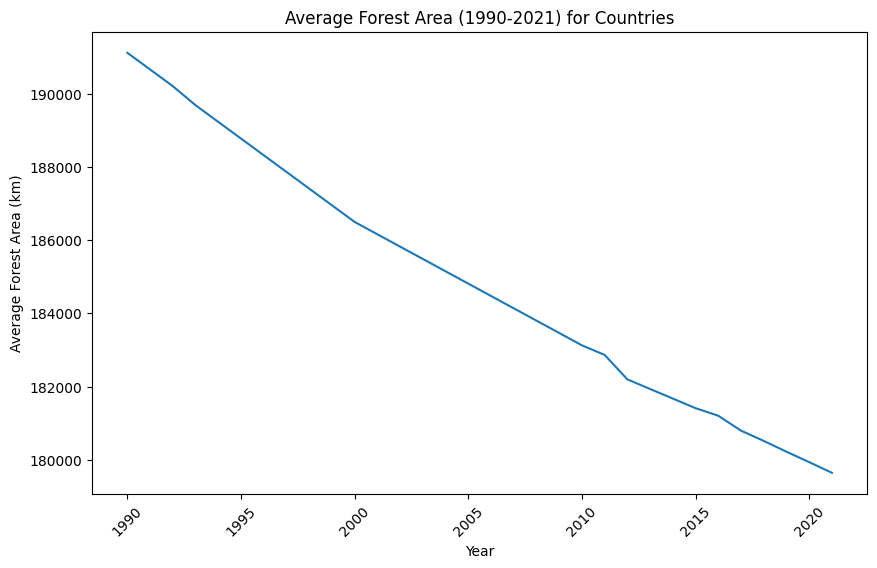

In [73]:
# For countries, we plot the average forest area over time
country_avg_forest_area = country_data.groupby('Year')['Forest_Area'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=country_avg_forest_area.index, y=country_avg_forest_area.values)
plt.title("Average Forest Area (1990-2021) for Countries")
plt.xlabel("Year")
plt.ylabel("Average Forest Area (km)")
plt.xticks(rotation=45)
plt.show()

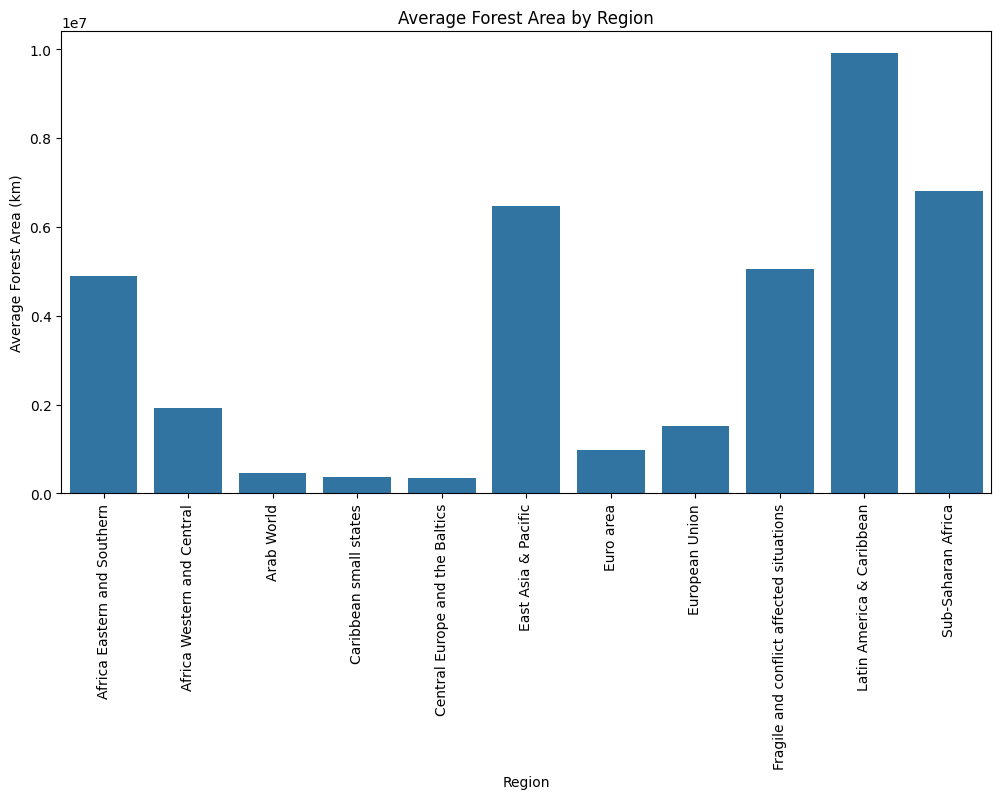

In [74]:
# Grouping by region and plotting the average forest area
region_avg_forest_area = region_data.groupby('Country_Name')['Forest_Area'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Country_Name', y='Forest_Area', data=region_avg_forest_area)
plt.title("Average Forest Area by Region")
plt.xlabel("Region")
plt.ylabel("Average Forest Area (km)")
plt.xticks(rotation=90)
plt.show()

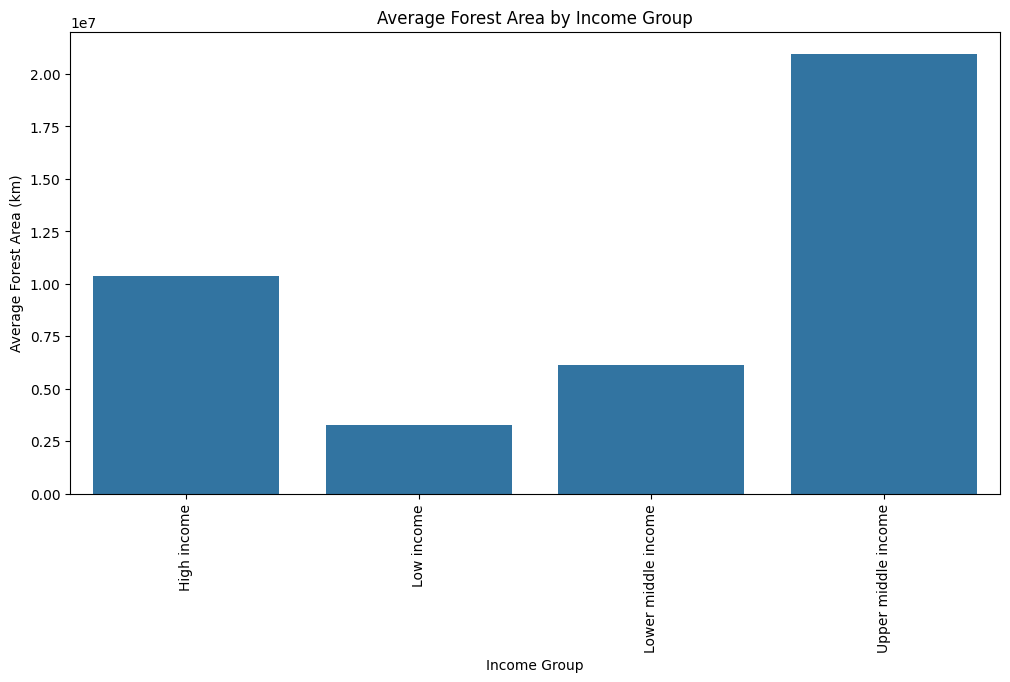

In [75]:
# Grouping by income group and plotting the average forest area
income_group_avg = income_group_data.groupby('Country_Name')['Forest_Area'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Country_Name', y='Forest_Area', data=income_group_avg)
plt.title("Average Forest Area by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Average Forest Area (km)")
plt.xticks(rotation=90)
plt.show()

In [76]:
#top 10 countries with most/least deforestation
df_2021 = country_data[country_data['Year'] == 2021].set_index('Country_Name')
df_1990 = country_data[country_data['Year'] == 1990].set_index('Country_Name')

forest_change = df_2021['Forest_Area'] - df_1990['Forest_Area']
forest_change_sorted = forest_change.sort_values(ascending=False)
print('top 10 countries with least deforestation')
print(forest_change_sorted.head(10))
print()
print('top 10 countries with most deforestation')
print(forest_change_sorted.tail(10) )

top 10 countries with least deforestation
Country_Name
China                647171.60
India                 84884.00
United States         73450.00
Viet Nam              53430.30
Spain                 46718.00
Chile                 30875.70
France                29004.00
Turkiye               25928.80
Italy                 20301.90
Iran, Islamic Rep.    16895.70
Name: Forest_Area, dtype: float64

top 10 countries with most deforestation
Country_Name
Mozambique          -68803.95
Bolivia             -71839.47
Paraguay            -97229.33
Myanmar            -109643.00
Tanzania           -121140.10
Sudan              -125399.20
Angola             -132104.67
Congo, Dem. Rep.   -255751.37
Indonesia          -270173.37
Brazil             -935066.33
Name: Forest_Area, dtype: float64


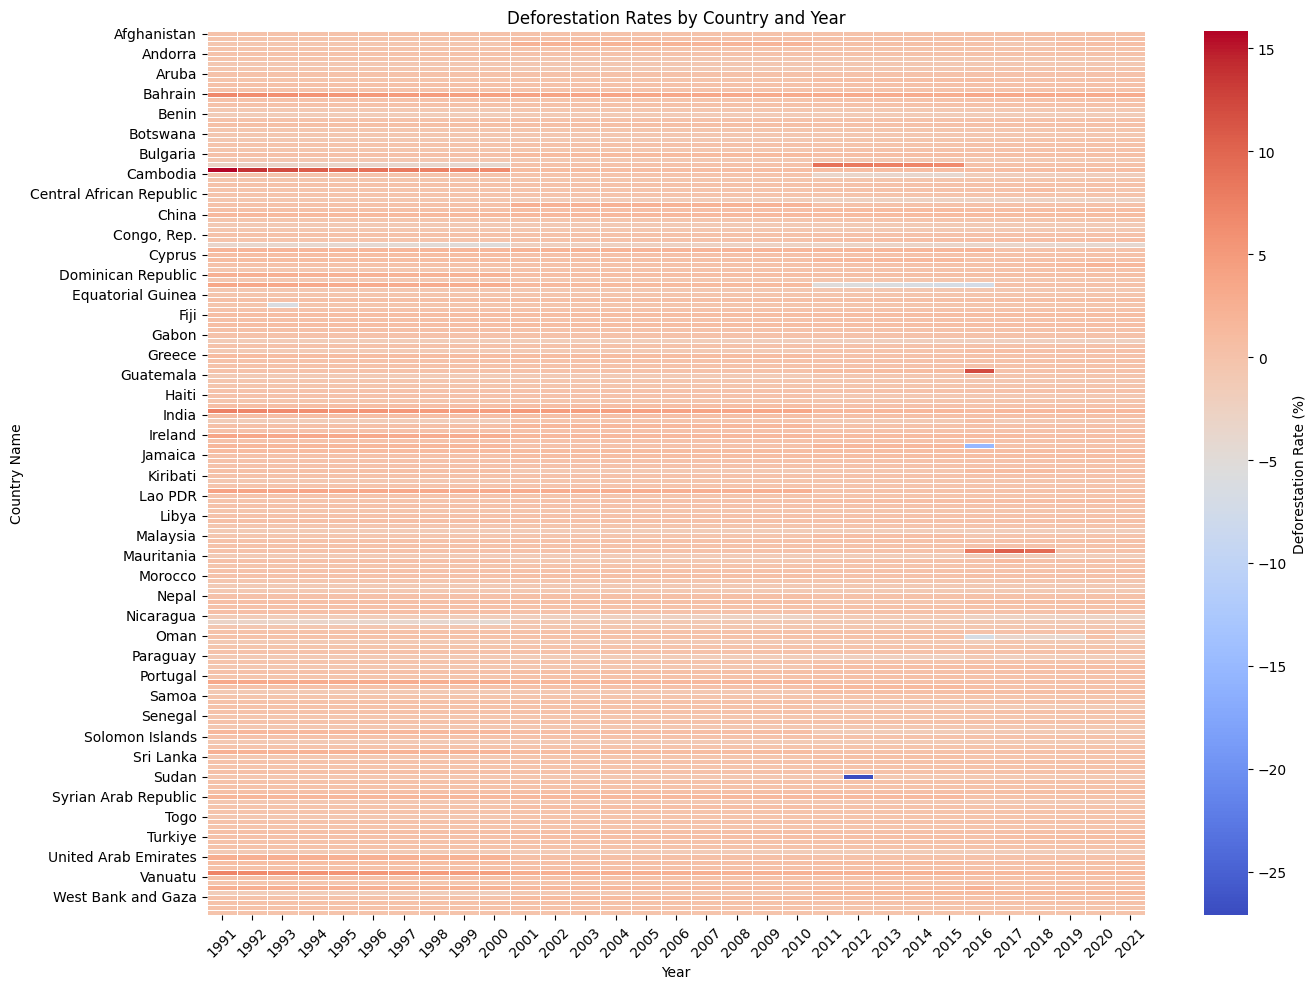

In [77]:

country_data = country_data.sort_values(by=['Country_Name', 'Year'])

country_data['Deforestation_Rate'] = country_data.groupby('Country_Name')['Forest_Area'].pct_change() * 100

heatmap_data = country_data.pivot_table(index='Country_Name', columns='Year', values='Deforestation_Rate')

plt.figure(figsize=(14, 10))

sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Deforestation Rate (%)'})

plt.title("Deforestation Rates by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country Name")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 6. Conclusion and Insights <a class="anchor" id="chapter6"></a>

In [ ]:
### Conclusion and Insights

Based on the Exploratory Data Analysis (EDA) conducted on global forest area trends, several key insights emerge:

1. Forest Area Trends by Country (1990-2021):
   - Over the period from 1990 to 2021, countries show varying trends in forest area. Some countries maintained or even expanded their forest areas, likely due to conservation efforts or reforestation policies, while others faced significant deforestation pressures, possibly from agricultural expansion, urban development, or logging.
   - The year-by-year average forest area for countries shows gradual changes, with declines indicating deforestation trends in certain regions and gains in others.

2. Forest Area Distribution by Region:
   - Regions displayed substantial variance in average forest cover. Certain regions with high forest density have distinct forest conservation challenges compared to regions with lower forest cover. Regions such as [insert region name, e.g., South America] may have shown higher forest areas, while [another region, e.g., Africa] could reflect different pressures impacting forest coverage.

3. Impact of Income Levels on Forest Area:
   - Forest area varies significantly across income groups. Lower-income countries, facing fewer resources for conservation and sustainable practices, might be more vulnerable to deforestation. Conversely, high-income countries often exhibit greater forest conservation resources, which may result in higher forest area stability or growth.

4. Top Countries by Deforestation and Conservation:
   - Analysis of the top 10 countries with the most and least deforestation reveals clear contrasts. Countries with successful forest area maintenance or growth may have implemented effective conservation practices or policies. In contrast, countries with high deforestation rates face critical pressures from industries or land-use changes.

5. Deforestation Rate Heatmap:
   - The heatmap visualization of deforestation rates by country over time provides a clear picture of where deforestation has been most persistent. Countries with consistently high deforestation rates are often facing economic, policy, or environmental pressures. This visualization helps identify critical regions where intervention may be needed to curb deforestation rates.

### Summary
The EDA provides valuable insights into global forest area trends, highlighting regions and countries where forest cover is either at risk or successfully preserved. Countries and regions with high deforestation rates may benefit from targeted conservation programs and sustainable land-use practices. Meanwhile, countries that have successfully maintained or expanded their forest cover could serve as models for conservation efforts.

This analysis forms a foundation for further exploration into the underlying causes of deforestation, such as economic policies, agricultural demands, or urbanization, and allows for a deeper understanding of what successful conservation strategies might entail.
